In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import string
import pandas as pd
all_text  = """
 Google and Facebook are strangling the free press to death. Democracy is the loserGoogle an 
Your 60-second guide to security stuff Google touted today at Next '18
A Guide to Using Android Without Selling Your Soul to Google
Review: Lenovo’s Google Smart Display is pretty and intelligent
Google Maps user spots mysterious object submerged off the coast of Greece - and no-one knows what it is
Android is better than IOS
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency
is a numerical statistic that is intended to reflect
how important a word is to a document in a collection or corpus.
It is often used as a weighting factor in searches of information retrieval
text mining, and user modeling. The tf-idf value increases proportionally
to the number of times a word appears in the document
and is offset by the frequency of the word in the corpus
""".split("\n")[1:-1]

# Preprocessing and tokenizing
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [29]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)

tfidf = tfidf_vectorizer.fit_transform(all_text)

kmeans = KMeans(n_clusters=2).fit(tfidf)

In [30]:
lines_for_predicting = ["tf and idf is awesome!", "some androids is there"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

array([0, 1])

_________________________________________________

### CLUSTERING

In [63]:
clean_df= pd.read_csv('upd_clean_df.csv')
clean_df.drop('Unnamed: 0',inplace = True,axis = 1)
clean_df.head(3)

,carrier,location,date_time,clean_text,polarity,fact,month,hour,sense_dummy,text_len,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,churn
0,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,issue closed caption walking dead show display...,-0.150,1,3,23,-1,51,1,30,evening,19,0.001382,0.999999,"['issue', 'closed', 'caption', 'walking', 'dea...",17,0
1,verizonsupport,NaN,2021-03-30 23:56:55,this could due regional restriction have check...,-0.125,1,3,23,-1,52,1,30,evening,55,0.004000,0.999992,"['this', 'could', 'due', 'regional', 'restrict...",4,0
2,verizonsupport,NaN,2021-03-30 23:55:30,happy help anything related fios twitter pleas...,0.400,0,3,23,1,63,1,30,evening,30,0.002182,0.999998,"['happy', 'help', 'anything', 'related', 'fios...",18,0


In [64]:
clean_df = clean_df[~clean_df.clean_text.isnull()]
# clean_df[clean_df.clean_text.isnull()].shape
clean_df

,carrier,location,date_time,clean_text,polarity,fact,month,hour,sense_dummy,text_len,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,churn
0,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,issue closed caption walking dead show display...,-0.150000,1,3,23,-1,51,1,30,evening,19,0.001382,0.999999,"['issue', 'closed', 'caption', 'walking', 'dea...",17,0
1,verizonsupport,NaN,2021-03-30 23:56:55,this could due regional restriction have check...,-0.125000,1,3,23,-1,52,1,30,evening,55,0.004000,0.999992,"['this', 'could', 'due', 'regional', 'restrict...",4,0
2,verizonsupport,NaN,2021-03-30 23:55:30,happy help anything related fios twitter pleas...,0.400000,0,3,23,1,63,1,30,evening,30,0.002182,0.999998,"['happy', 'help', 'anything', 'related', 'fios...",18,0
3,verizonsupport,NaN,2021-03-30 23:55:24,know think help literally month trying help th...,0.000000,1,3,23,0,50,1,30,evening,24,0.001745,0.999998,"['know', 'think', 'help', 'literally', 'month'...",5,0
4,verizonsupport,NaN,2021-03-30 23:54:26,happy look please send direct message follow v...,0.450000,0,3,23,1,71,1,30,evening,26,0.001891,0.999998,"['happy', 'look', 'please', 'send', 'direct', ...",11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,tmobilehelp,Erie PA,2021-03-30 22:40:49,line though and referring,0.000000,1,3,22,0,25,1,30,evening,49,0.003563,0.999994,"['line', 'though', 'and', 'referring']",6,0
645,tmobilehelp,"Bellevue, WA",2021-03-30 22:40:01,hey experience super important want make sure ...,0.411111,0,3,22,1,50,1,30,evening,1,0.000073,1.000000,"['hey', 'experience', 'super', 'important', 'w...",12,0
646,tmobilehelp,"Bellevue, WA",2021-03-30 22:39:22,thank reaching today ryan the essential plan a...,0.000000,1,3,22,0,52,1,30,evening,22,0.001600,0.999999,"['thank', 'reaching', 'today', 'ryan', 'the', ...",6,0
647,tmobilehelp,"Bellevue, WA",2021-03-30 22:36:19,committed providing reliable service need stay...,0.000000,1,3,22,0,68,1,30,evening,19,0.001382,0.999999,"['committed', 'providing', 'reliable', 'servic...",5,0


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(clean_df['clean_text'].values)

# bow_vect = CountVectorizer(ngram_range=(1,2))
# bag_of_words = count_vectorizer.fit_transform(clean_df['clean_text'])

In [80]:
print(final_tf_idf.shape)

(638, 4309)


In [104]:
feature_names = tf_idf_vect.get_feature_names()
pd.DataFrame(final_tf_idf.toarray(), columns = feature_names)

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,youtube where,ypr,ypr yard,yr,yr ago,zip,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,𝐓𝐇𝐄,𝐓𝐇𝐄 𝐋𝐄𝐀𝐃𝐄𝐑
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
num_clusters = 2

# Метод к-средних - KMeans
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_clusters)
print(km)
# get_ipython().magic('time km.fit(tfidf_matrix)')
idx = km.fit(final_tf_idf)
print(km.labels_)
clean_df['kmeans_churn'] = km.labels_
# clusters = km.labels_.tolist()
clean_df.head(2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

,carrier,location,date_time,clean_text,polarity,fact,month,hour,sense_dummy,text_len,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,churn,kmeans_churn
0,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,issue closed caption walking dead show display...,-0.150,1,3,23,-1,51,1,30,evening,19,0.001382,0.999999,"['issue', 'closed', 'caption', 'walking', 'dea...",17,0,0
1,verizonsupport,NaN,2021-03-30 23:56:55,this could due regional restriction have check...,-0.125,1,3,23,-1,52,1,30,evening,55,0.004000,0.999992,"['this', 'could', 'due', 'regional', 'restrict...",4,0,0


In [143]:
clean_df['kmeans_churn'].value_counts()

0    602
1     36
Name: kmeans_churn, dtype: int64

In [144]:
clean_df.head(2)

,carrier,location,date_time,clean_text,polarity,fact,month,hour,sense_dummy,text_len,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,churn,kmeans_churn
0,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,issue closed caption walking dead show display...,-0.150,1,3,23,-1,51,1,30,evening,19,0.001382,0.999999,"['issue', 'closed', 'caption', 'walking', 'dea...",17,0,0
1,verizonsupport,NaN,2021-03-30 23:56:55,this could due regional restriction have check...,-0.125,1,3,23,-1,52,1,30,evening,55,0.004000,0.999992,"['this', 'could', 'due', 'regional', 'restrict...",4,0,0


### накидаем простенькие модельки на 2 случая - когда у нас данные размечены кластеризациией и когда размечены исходя из полярности

In [188]:
# split with kmeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

km_train_x, km_valid_x, km_train_y, km_valid_y = \
    train_test_split(final_tf_idf, clean_df['kmeans_churn'], \
    test_size=0.2, random_state=45)

In [189]:
# split with manual targeting by polarity <-0.5
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

m_train_x, m_valid_x, m_train_y, m_valid_y = \
    train_test_split(final_tf_idf, clean_df['churn'], \
    test_size=0.2, random_state=45)

In [190]:
print(km_train_y.value_counts()/km_train_y.shape[0])
print(km_valid_y.value_counts()/km_valid_y.shape[0])

0    0.937255
1    0.062745
Name: kmeans_churn, dtype: float64
0    0.96875
1    0.03125
Name: kmeans_churn, dtype: float64


In [191]:
print(m_train_y.value_counts()/m_train_y.shape[0])
print(m_valid_y.value_counts()/m_valid_y.shape[0])

0    0.994118
1    0.005882
Name: churn, dtype: float64
0    0.984375
1    0.015625
Name: churn, dtype: float64


In [204]:
# для k-means данных
from sklearn.linear_model import LogisticRegression
km_lr = LogisticRegression()
km_lr.fit(km_train_x,km_train_y)
km_y_pred_lr =km_lr.predict(kmvalid_x)


from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
print('для логистической регрессии', roc_auc_score(km_valid_y, km_y_pred_lr))

для логистической регрессии 1.0


In [205]:
# для manual targeted данных
from sklearn.linear_model import LogisticRegression
m_lr = LogisticRegression()
m_lr.fit(m_train_x,m_train_y)
m_y_pred_lr =m_lr.predict(mvalid_x)


from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
print('для логистической регрессии', roc_auc_score(m_valid_y, m_y_pred_lr))

для логистической регрессии 0.5


In [207]:
# confusion_matrix - Воспользуемся функцией построения матрицы ошибок из документации sklearn

import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[124   0]
 [  0   4]]


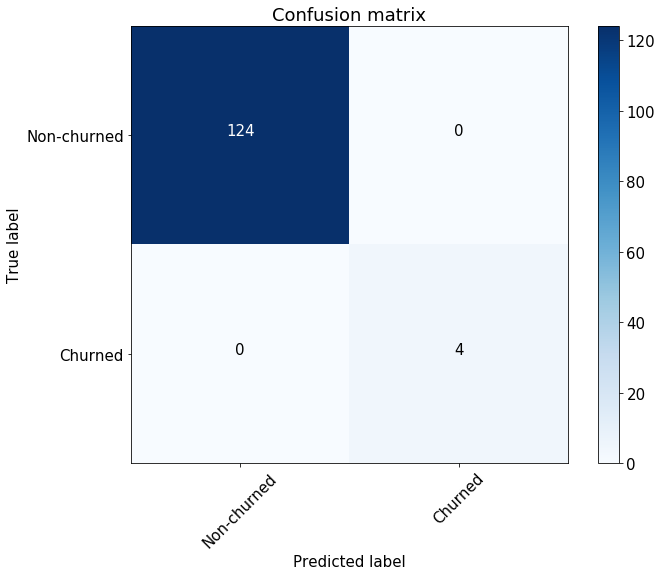

In [211]:
# для k_means данных
km_lr = LogisticRegression(random_state=42)
km_lr.fit(km_train_x, km_train_y)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(km_valid_y, km_lr.predict(m_valid_x))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Confusion matrix, without normalization
[[126   0]
 [  2   0]]


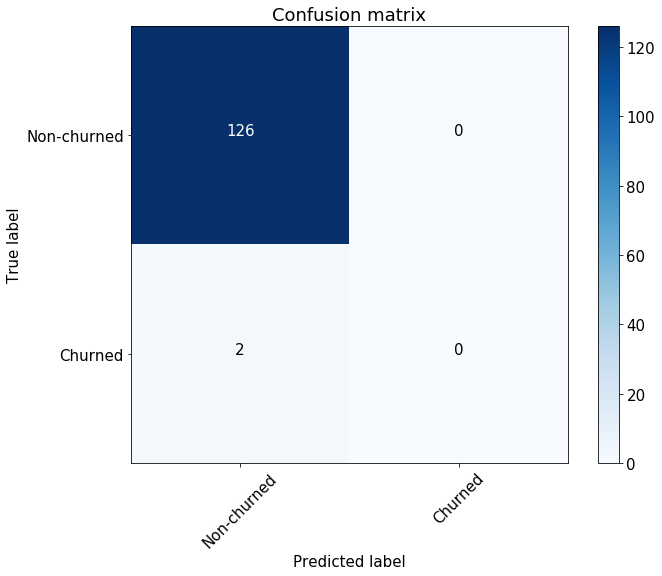

In [210]:
# для ручных данных
m_lr = LogisticRegression(random_state=42)
m_lr.fit(m_train_x, m_train_y)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(m_valid_y, m_lr.predict(m_valid_x))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [213]:
# Classification Models and Success metrics
  
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
  
def model(classifier, train_vector, valid_vector,train_y,valid_y):
    classifier.fit(train_vector, train_y)  
    predict_y = classifier.predict(valid_vector)
    accuracy = accuracy_score(valid_y, predict_y)
    precision = precision_score(valid_y, predict_y,labels=[0,1,2,3,4,5,6],average=None)
    recall = recall_score(valid_y, predict_y,labels=[0,1,2,3,4,5,6],average=None)
    conf_matrix = confusion_matrix(valid_y, predict_y)
    print('\nAccuracy_score: {:.3f}'.format(accuracy ))
    print('precision_score: {:.3f}'.format(precision.mean()))
    print('recall_score: {:.3f}'.format(recall.mean()))
    print('\nconfusion_matrix: \n')
    
    print(confusion_matrix(valid_y, predict_y))
    print(classification_report(valid_y, predict_y))
    return roc_auc_pic(predict_y, valid_y),plot_precision_recall_curve(predict_y, valid_y)


In [197]:
# roc_auc_pic
import matplotlib.pyplot as plt 
def roc_auc_pic(y_hat_test, y_test):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    plt.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show() 
    pass
# roc_auc_pic(y_pred_lr, valid_y)


In [198]:
# precision_recall
import numpy as np
def plot_precision_recall_curve(y_pred_proba, y_test):
    plt.figure(figsize=(10, 10))
    f_scores = np.linspace(0.4, 0.9, num=6)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.2f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    precision, recall, _ =  precision_recall_curve(y_test, y_pred_proba)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall', size=15)
    plt.ylabel('Precision', size=15)
    plt.title('Precision-Recall curve', size=18)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()
# plot_precision_recall_curve(y_pred_lr, valid_y)

C:\Users\au00174\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\au00174\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy_score: 1.000
precision_score: 0.286
recall_score: 0.286

confusion_matrix: 

[[124   0]
 [  0   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00         4

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



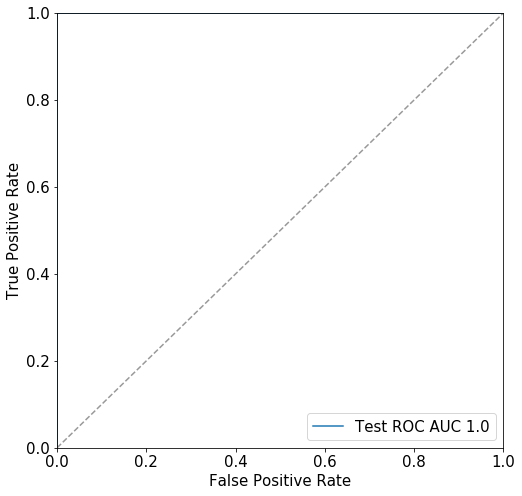

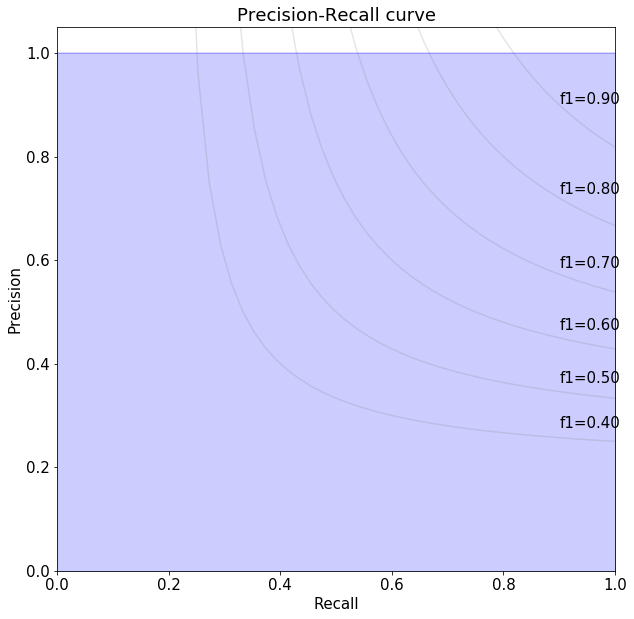

(None, None)

In [214]:
model(LogisticRegression(), km_train_x, km_valid_x,km_train_y,km_valid_y)

C:\Users\au00174\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\au00174\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\au00174\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy_score: 0.984
precision_score: 0.141
recall_score: 0.143

confusion_matrix: 

[[126   0]
 [  2   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       126
           1       0.00      0.00      0.00         2

    accuracy                           0.98       128
   macro avg       0.49      0.50      0.50       128
weighted avg       0.97      0.98      0.98       128



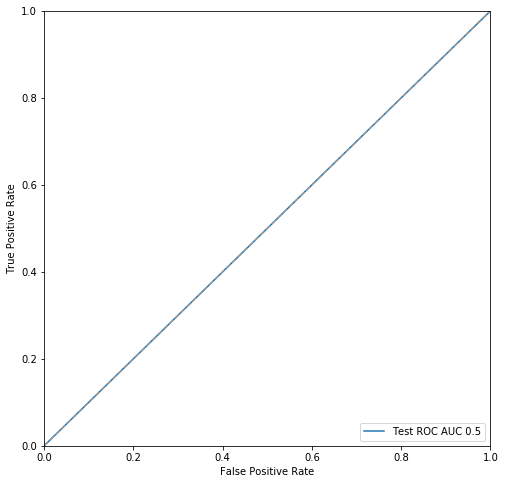

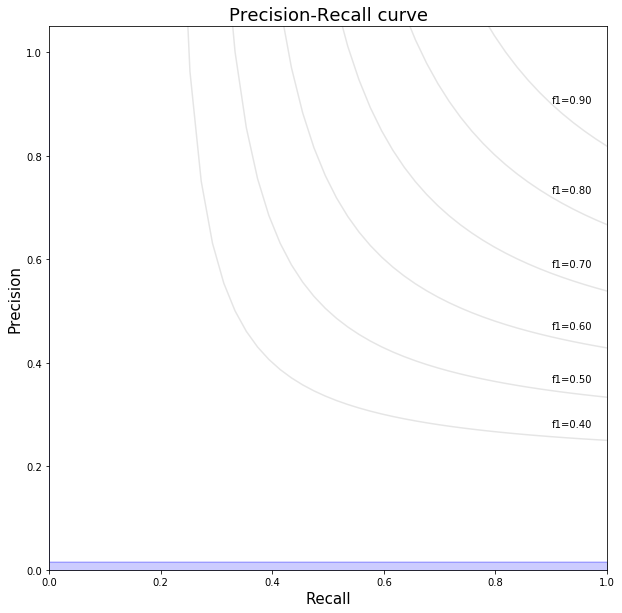

(None, None)

In [200]:
model(LogisticRegression(), m_train_x, m_valid_x,m_train_y,m_valid_y)

In [215]:
# from sklearn.naive_bayes import MultinomialNB
# model(MultinomialNB(), train_x, valid_x)

In [ ]:
from sklearn.naive_bayes import MultinomialNB